# Effectiveness of feedforward neural network for classifying images

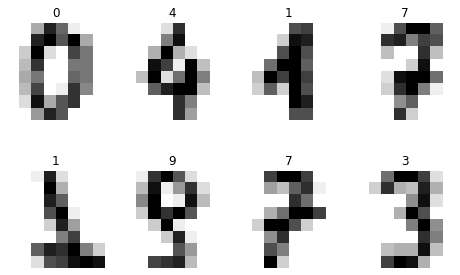

In [29]:
from sklearn.datasets import load_digits
import pandas as pd
# import sys
import numpy as np
# np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 1000)


digits = load_digits()
data = digits['data']
images = digits['images']
target = digits['target']
target_names = digits['target_names']
# print("data images target target_names: {} {} {} {}".format(len(data), len(images), len(target), len(target_names)))

fig = plt.figure(figsize=(8,5))
first_row = [0,100,200,300]
sec_row = [1000, 1100, 1200, 1300]
n_plots = 8
i=0
for val in first_row:
    plt.subplot(2,4,i+1)
    plt.imshow(images[val], cmap='binary')
    plt.title(target[val])
    plt.axis('off')
    i +=1
    
for val in sec_row:
    plt.subplot(2,4,i+1)
    plt.imshow(images[val], cmap='binary')
    plt.title(target[val])
    plt.axis('off')
    i +=1
# plt.imshow(images[0],cmap='binary')

##### Convert the image pixel data 'data' into a DataFrame and convert the 'target' numpy array containing the value of a digit at the corresponding index in 'data' into Series

In [30]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.neighbors import KNeighborsClassifier 

# Convert the above arrays into DataFrames and Series
source_df = pd.DataFrame(data)
target_s = pd.Series(target)

# Shuffle the data
np.random.seed(1)
shuffled_index = np.random.permutation(source_df.index)
source_df = source_df.loc[shuffled_index]
target_s = target_s.loc[shuffled_index]


##### Linear and logistic regression assume linearity between input features and the output. Since k-nearest neighbor makes no such assumption, we can use to capture non-linearity of data. k-nearest neighbor compares every training observation with the test feature and chooses the closest match. So, let's use the KNeighborClassifer

# Train and Test using KNeighborClassifer with K-Fold Validation

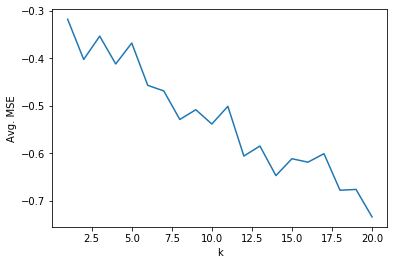

[-0.31828507795100225, -0.40286067804998765, -0.3538393961890621, -0.41231625835189306, -0.3683296213808463, -0.457279138827023, -0.4689717891610987, -0.5290262311309082, -0.508469438257857, -0.5385473892600842, -0.501321455085375, -0.6058636476119773, -0.5847611977233358, -0.6469784706755753, -0.6114983914872556, -0.6187564959168522, -0.6009193268992824, -0.6777010640930463, -0.6760418213313537, -0.7338282603316011]


In [31]:
## Performing 4-fold cross validation
kf = KFold(4, shuffle=True, random_state=1)

# We would like to find an optimal value of k so that we can get the least error.
k_values = 20
knn_avg_mses = []

for k in range(1,k_values+1):
    knn = KNeighborsClassifier(k)
    mses = cross_val_score(knn, source_df, target_s,scoring='neg_mean_squared_error',cv=kf)
    avg_mse = np.mean(mses)
    knn_avg_mses.append(avg_mse)
    
# plot a line graph
plt.plot(range(1,k_values+1), knn_avg_mses)
plt.xlabel('k')
plt.ylabel('Avg. MSE')
plt.show()
print(knn_avg_mses)

We performed  hyperparameterization to find an least MSE( Mean Square Error). The optimal value at which MSE is minumum is at k=1. For all other values of k, MSE is increasing. Due to limitations of the K-Nearest Neighbor, such as high memory usage and no model representation to debug and explore we would use MLPClassifier.

# Train and Test using MLPClassifer with K-Fold Validation

We will try different number of neurons with different number of hidden layer. We will use the same model evaulation technique 'mean square error' to determine if we can bring down our error.

### Number of hidden layers=1 with 4-Fold validation

C:\Users\siddh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

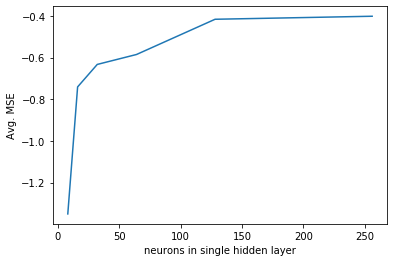

[-1.350756000989854, -0.7406434050977481, -0.6326540460282108, -0.5848874041078941, -0.4156953724325662, -0.40117792625587734]


In [32]:
from sklearn.neural_network import MLPClassifier

hidden_layer_neurons = (8,16,32,64,128,256)
mlp_avg_mses = []
for n in hidden_layer_neurons:
    mlp = MLPClassifier(hidden_layer_sizes=(n,))
    mses = cross_val_score(mlp, source_df, target_s,scoring='neg_mean_squared_error',cv=kf)
    avg_mse = np.mean(mses)
    mlp_avg_mses.append(avg_mse)
    
# plot a line graph
plt.plot(hidden_layer_neurons, mlp_avg_mses)
plt.xlabel('neurons in single hidden layer')
plt.ylabel('Avg. MSE')
plt.show()
print(mlp_avg_mses)

At around 128 neurons in a single hidden layer is where we get optimal performance of model. Comparing this average MSE with MSE calculated using KNeighborClassifer with 4-Fold validation, we still need to improve our model. 

### Number of hidden layers=2 and 4-Fold validation

C:\Users\siddh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

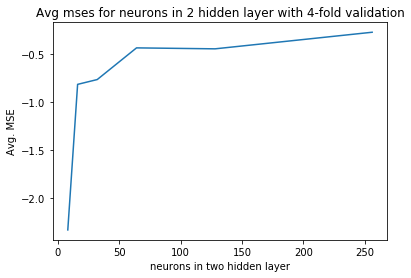

[-2.3320786933927247, -0.8189656025736204, -0.7688332096015837, -0.4396275674338035, -0.44958302400395944, -0.2771133382826033]


In [33]:
mlp_avg_mses_2_hidden_layer = []
for n in hidden_layer_neurons:
    mlp = MLPClassifier(hidden_layer_sizes=(n,n))
    mses = cross_val_score(mlp, source_df, target_s,scoring='neg_mean_squared_error',cv=kf)
    avg_mse = np.mean(mses)
    mlp_avg_mses_2_hidden_layer.append(avg_mse)
    
# plot a line graph
plt.plot(hidden_layer_neurons, mlp_avg_mses_2_hidden_layer)
plt.xlabel('neurons in two hidden layer')
plt.ylabel('Avg. MSE')
plt.title('Avg mses for neurons in 2 hidden layer with 4-fold validation')
plt.show()
print(mlp_avg_mses_2_hidden_layer)

When number of hidden layers = 2 with 4-fold validation, the model has been able to perform better than our previous MLPClassifer model with single hidden layer as well as KClassifier model.

### Number of hidden layers=2 and perform 6-Fold validation

C:\Users\siddh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

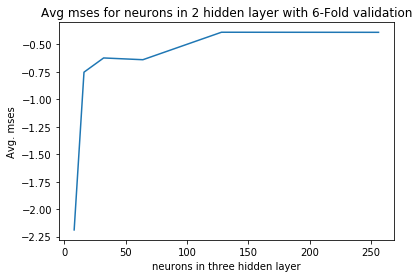

[-2.1896275674338037, -0.7523100717644148, -0.6227332343479337, -0.6388022766641921, -0.3884583024003959, -0.3891363523880228]


In [34]:
kf_6 = KFold(6, shuffle=True, random_state=1)
mlp_avg_mses_2_hidden_layer_6_fold = []
for n in hidden_layer_neurons:
    mlp = MLPClassifier(hidden_layer_sizes=(n,n))
    mses = cross_val_score(mlp, source_df, target_s,scoring='neg_mean_squared_error',cv=kf)
    avg_mse = np.mean(mses)
    mlp_avg_mses_2_hidden_layer_6_fold.append(avg_mse)
    
plt.plot(hidden_layer_neurons, mlp_avg_mses_2_hidden_layer_6_fold)
plt.xlabel('neurons in three hidden layer')
plt.ylabel('Avg. mses')
plt.title('Avg mses for neurons in 2 hidden layer with 6-Fold validation')
plt.show()
print(mlp_avg_mses_2_hidden_layer_6_fold)

When number of hidden layers=2 with 6-Fold validation,the model's performance has decreased.

### Number of hidden layers=3 with 4-Fold validation. 

C:\Users\siddh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

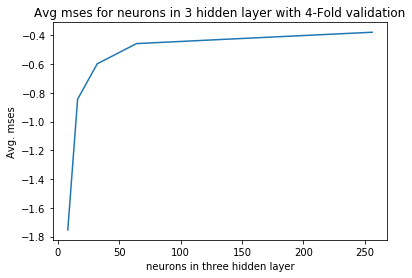

[-1.753177431328879, -0.8443083395199209, -0.598173719376392, -0.4579819351645632, -0.4313264043553576, -0.37896560257362044]


In [35]:
mlp_avg_mses_3_hidden_layer_4_fold = []
for n in hidden_layer_neurons:
    mlp = MLPClassifier(hidden_layer_sizes=(n,n,n))
    mses = cross_val_score(mlp, source_df, target_s,scoring='neg_mean_squared_error',cv=kf)
    avg_mse = np.mean(mses)
    mlp_avg_mses_3_hidden_layer_4_fold.append(avg_mse)
    
plt.plot(hidden_layer_neurons, mlp_avg_mses_3_hidden_layer_4_fold)
plt.xlabel('neurons in three hidden layer')
plt.ylabel('Avg. mses')
plt.title('Avg mses for neurons in 3 hidden layer with 4-Fold validation')
plt.show()
print(mlp_avg_mses_3_hidden_layer_4_fold)

When number of hidden layer=3 with 4-Fold validation, the model performed less optimally than number of hidden layer=2 with 4-Fold validation. This might be due to overfitting. 

Let's try 6-Fold Validation with 3 hidden layers to see if hyperparameterization can further improve our model.

### Number of hidden layers=3 with 6-Fold validation

C:\Users\siddh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

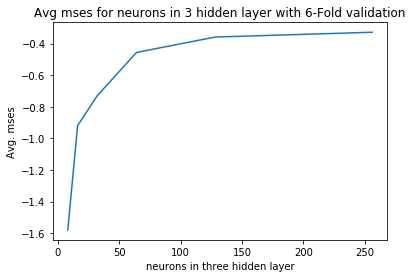

[-1.5799628390932738, -0.9194518766257896, -0.7300204384986994, -0.4557636566332219, -0.35832404310665184, -0.32782980304719433]


In [36]:
mlp_avg_mses_3_hidden_layer_6_fold = []
for n in hidden_layer_neurons:
    mlp = MLPClassifier(hidden_layer_sizes=(n,n,n))
    mses = cross_val_score(mlp, source_df, target_s,scoring='neg_mean_squared_error',cv=kf_6)
    avg_mse = np.mean(mses)
    mlp_avg_mses_3_hidden_layer_6_fold.append(avg_mse)
    
plt.plot(hidden_layer_neurons, mlp_avg_mses_3_hidden_layer_6_fold)
plt.xlabel('neurons in three hidden layer')
plt.ylabel('Avg. mses')
plt.title('Avg mses for neurons in 3 hidden layer with 6-Fold validation')
plt.show()
print(mlp_avg_mses_3_hidden_layer_6_fold)


Even with number of hidden layer=3 with 6-Fold validation, the model does not improve compared our most optimal model with number of hidden layer=2 with 4-Fold validation.
